In [1]:
%matplotlib inline
import sys 
sys.path.append("../../")
from dbrick import *
from vis_dbricks import *
from dna_features_viewer import BiopythonTranslator

In [2]:
#CGGCCGGCTTGTCGACGACGGCG GT CTCCGTCGTCAGGATCATCCGGGC
#TCGTGGTTTGTCTGGTCAACCACCGCG GT CTCAGTGGTGTACGGTACAAACCC
#ATGCCAACACAATTAACATC TC AATCAAGGTAAATGCTTTTTGCTTTTTTTGC
#GCGAGTTTTTATTTCGTTTATT TC AATTAAGGTAACTAAAAAACTCCTTT
bxb1_attb  = "CGGCCGGCTTGTCGACGACGGCGGTCTCCGTCGTCAGGATCATCCGGGC"
bxb1_attp  = "TCGTGGTTTGTCTGGTCAACCACCGCGGTCTCAGTGGTGTACGGTACAAACCC"
tp901_attb = "ATGCCAACACAATTAACATCTCAATCAAGGTAAATGCTTTTTGCTTTTTTTGC"
tp901_attp = "GCGAGTTTTTATTTCGTTTATTTCAATTAAGGTAACTAAAAAACTCCTTT"

In [3]:
xor_gate = Dbrick(record="input/addgene_44453.gbk")

In [4]:
xor_gate.add_feature(bxb1_attb,  qualifiers={"label":"bxb1_attb"})
xor_gate.add_feature(bxb1_attp,  qualifiers={"label":"bxb1_attp"}, strand=-1)
xor_gate.add_feature(tp901_attb, qualifiers={"label":"tp901_attb"})
xor_gate.add_feature(tp901_attp, qualifiers={"label":"tp901_attp"}, strand=-1)

New feature was added in the range of start 129 to end 178.
New feature was added in the range of start 319 to end 372.
New feature was added in the range of start 75 to end 128.
New feature was added in the range of start 372 to end 422.


In [5]:
#recombination by bxb1 -> recombination by TP901
xor_gate_a = xor_gate["GTCTCCGTCGTCAGGATCATCCGGGC":"GTCTCAGTGGTGTACGGTACAAACCC"]
xor_gate_b = xor_gate[reverse_complement("TCGTGGTTTGTCTGGTCAACCACCGCGGT"):reverse_complement("CGGCCGGCTTGTCGACGACGGCGGT")]

The region from start 153 to end 345 was extracted.
The region from start 344 to end 154 was extracted.


GTCTCCGTCG...CCACTGAG  
  GAGGCAGC...GGTGACTCTG
GTCTCAGTGG...CGACGGAG  
  GAGTCACC...GCTGCCTCTG
Based on complementary sticky end of each fragment, the Dbrick objects were joined. The sticky end is 'AC'
Based on complementary sticky end between 3' end and 5' end, the Dbrick object was circularized. The sticky end is 'GT'
The region from start 76 to end 422 was extracted.
The region from start 4859 to end 270 was extracted.


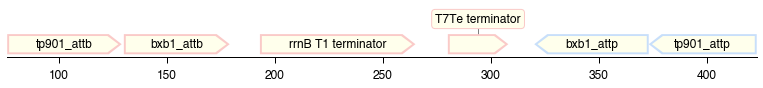

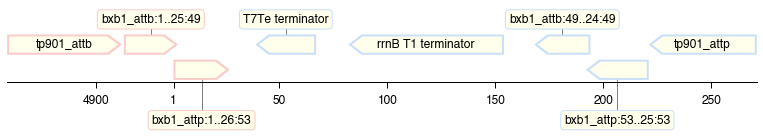

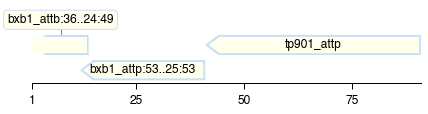

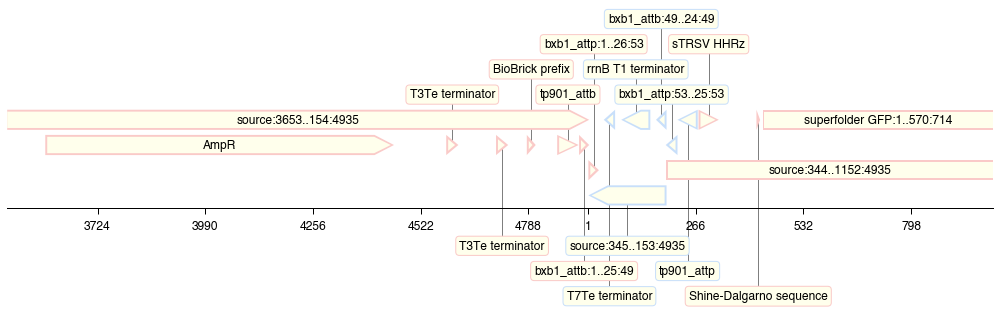

In [6]:
#Invertion of terminator region between bxb1_attB and bxb1_attP
xor_gate_a = shell(xor_gate_a,"**/--","--/**")
xor_gate_a.print_dsdna() 
xor_gate_a = reverse_complement(xor_gate_a)
xor_gate_a.print_dsdna()
xor_gate_b = shell(xor_gate_b,"**/--","--/**")
xor_gate_bxb1 = join_dbricks(xor_gate_a, xor_gate_b, topology="circular")
xor_gate_bxb1.write("output/xor_gate_bxb1.gbk")
fig = visualize(xor_gate,tp901_attb,tp901_attp)
fig.savefig("test1.pdf",bbox_inches="tight")

fig = visualize(xor_gate_bxb1,tp901_attb,tp901_attp)
fig.savefig("test2.pdf",bbox_inches="tight")

fig = visualize(xor_gate_bxb1[180:270])
fig.savefig("test3.pdf",bbox_inches="tight")

fig = visualize(xor_gate_bxb1,3500,1000,enlarge=1.5,unvisible_types=[])
fig.savefig("test4.pdf",bbox_inches="tight")

#graphic_record = BiopythonTranslator().translate_record("output/xor_gate_bxb1.gbk")
#graphic_record = graphic_record.crop((3500,1000))
#graphic_record.plot(figure_width=10, strand_in_label_threshold=7)

The region from start 4859 to end 270 was extracted.
Feature_ID  Label                  Type          Start  End  Strand  
0           tp901_attb             misc_feature  0      53   +       
1           source:5011..154:4935  source        0      79   +       
2           bxb1_attb:1..25:49     misc_feature  54     79   +       
3           bxb1_attp:1..26:53     misc_feature  77     103  +       
4           source:345..153:4935   source        77     270  -       
5           T7Te terminator        terminator    115    143  -       
6           rrnB T1 terminator     terminator    158    230  -       
7           bxb1_attb:49..24:49    misc_feature  244    270  -       
8           bxb1_attp:53..25:53    misc_feature  268    297  -       
9           source:344..422:4935   source        268    347  +       
10          tp901_attp             misc_feature  297    347  -       
The region from start 115 to end 143 was extracted.
The region from start 115 to end 143 was extracted.
The

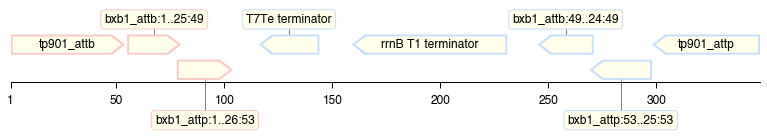

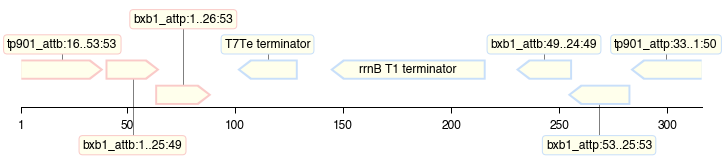

In [7]:
sub_brick = xor_gate_bxb1[tp901_attb:tp901_attp]
sub_brick.print_features()
fig = visualize(sub_brick)
print(sub_brick["5"])
#sub_sub_brick = substr(sub_brick, -100, 100, sub_brick["5"].seq)
sub_sub_brick = substr(sub_brick, -100, 100, (sub_brick["5"].seq,sub_brick["6"].seq))
fig = visualize(sub_sub_brick)

In [8]:
print(xor_gate.features[0])

type: source
location: [0:4935](+)
qualifiers:
    Key: mol_type, Value: ['other DNA']
    Key: organism, Value: ['synthetic DNA construct']

